### Grid World Solver

We solve the grid world using Bellman Optimality Equations in a recursive fashion. Initial value function will converge to the optimal value function after enough recursions.


In [35]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas

In [21]:
def v(s, vf):
    if s[0] < 0 or s[1] < 0 or s[0] >= 5 or s[1] >= 5:
        return 0
    else:
        return vf[s[0],  s[1]]
    
def r(s, a):
    s_prime = s + a
    if s[0] == 0 and s[1] == 1: # A
        return 10
    elif s[0] == 0 and s[1] == 3: # B
        return 5
    elif s_prime[0] < 0 or s_prime[0] >= 5 or s_prime[1] < 0 or s_prime[1] >= 5:
        return -1
    else:
        return 0

def get_next_state(s, a):
    if s[0] == 0 and s[1] == 1: # A
        return np.array([4, 1]) # A'
    elif s[0] == 0 and s[1] == 3: # B
        return np.array([2, 3]) # B'
    else:
        return s + a
    

In [22]:
gamma = 0.9
UP = np.array([-1, 0])
DOWN = np.array([1, 0])
LEFT = np.array([0, -1])
RIGHT = np.array([0, 1])

def bellman_update(v0):
    v1 = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            s = np.array([i, j])
            max_val = - np.Inf
            for a in [UP, DOWN, LEFT, RIGHT]:
                s_prime = get_next_state(s, a)
                new_val = r(s, a) + gamma * v(s_prime, v0)
                if new_val > max_val:
                    max_val = new_val
            v1[s[0],s[1]] = max_val
    return v1

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1199.14it/s]


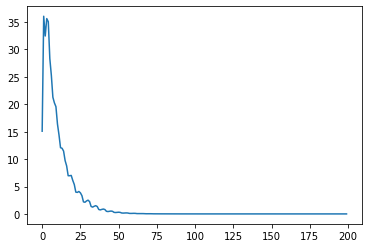

In [30]:
# Initialize uniform value function 
v_current = np.zeros((5,5)) + 1/25
error = []
for i in tqdm(range(200)):
    v_tmp = bellman_update(v_current)
    error.append(np.sum(np.absolute(v_tmp - v_current)))
    v_current = v_tmp
    
plt.plot(np.arange(200), error)

In [36]:
pandas.DataFrame(np.round(v_current, 1))

,0,1,2,3,4
0,22.0,24.4,22.0,19.4,17.5
1,19.8,22.0,19.8,17.8,16.0
2,17.8,19.8,17.8,16.0,14.4
3,16.0,17.8,16.0,14.4,13.0
4,14.4,16.0,14.4,13.0,11.7
